In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("Sample - Superstore.csv")
df.columns = df.columns.str.strip()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.City.nunique()

531

In [5]:
#df.City.unique()

In [6]:
df.Region.nunique()

4

In [7]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [8]:
df.Category.nunique()
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
#rename the some column names 
df.rename({'Row ID': 'Row_ID', 'Order ID': 'Order_ID','Ship Date': 'Ship_Date','Ship Mode': 'Ship_Mode','Customer ID': 'Customer_ID','Postal Code':'Postal_Code','Sub-Category':'Sub_Category','Product Name':'Product_Name','Product ID':'Product_ID','Order Date':'Order_Date','Customer Name':'Customer_Name',}, axis=1, inplace=True)
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
Categorical_col = ['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode','Customer_ID','Customer_Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product_ID', 'Category', 'Sub_Category','Product_Name']
Numerical_col = ['Row_ID','Postal_Code','Sales', 'Quantity', 'Discount', 'Profit']

### Remove Outliers 

In [14]:
#Remove outliers from numerical variables
z_scores = stats.zscore(df[Numerical_col])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
Cleaned_data = df[~outliers.any(axis=1)]

In [15]:
# getting variables that only have numerical values
#df2 = Cleaned_data.convert_dtypes().select_dtypes("number")
#df2

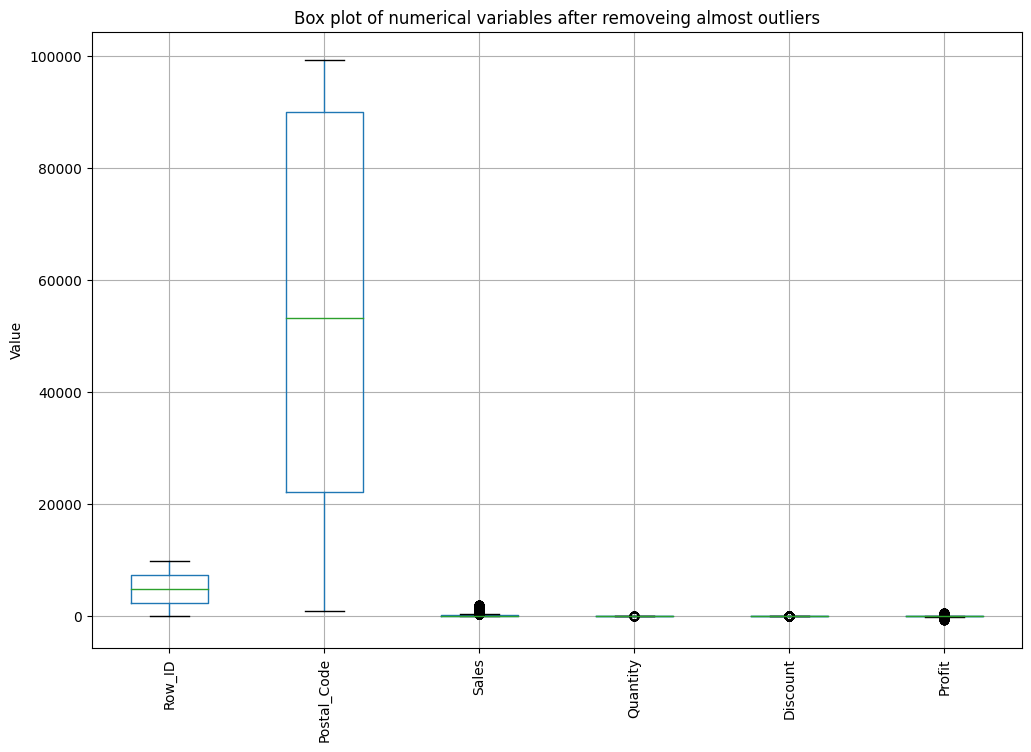

In [16]:
plt.figure(figsize=(12,8))
Cleaned_data.boxplot()
plt.title("Box plot of numerical variables after removeing almost outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [17]:
Cleaned_data.isna().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Visualizing the Distribution

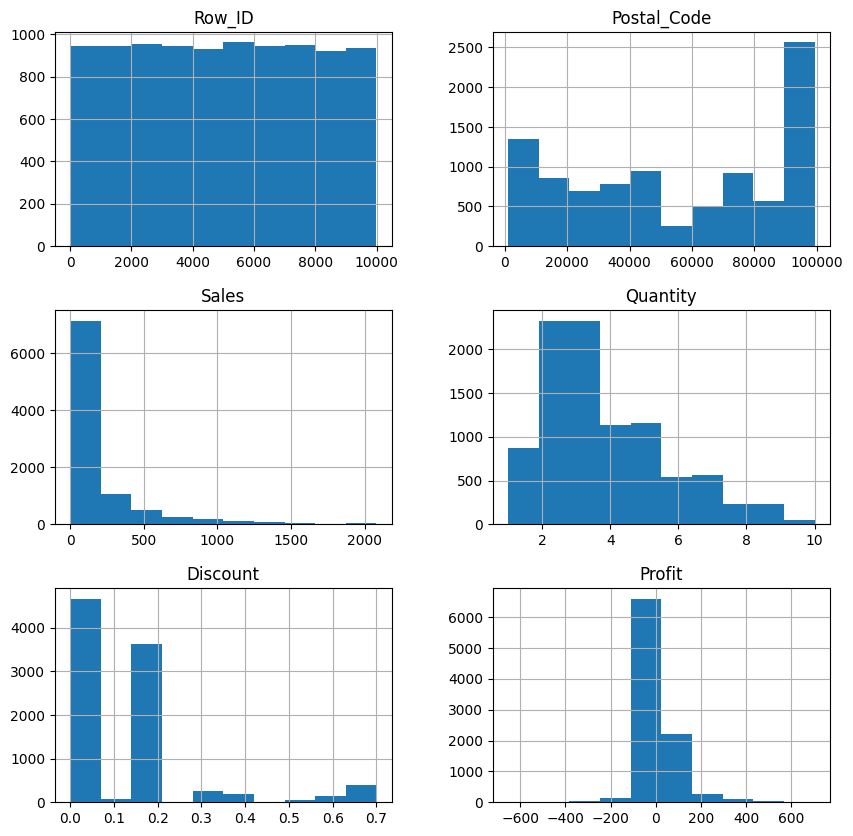

In [18]:
Cleaned_data.hist(figsize=(10,10))
plt.show()

### Analysis the sales and profit

In [19]:
data_ofsales = Cleaned_data[['Order_Date','Sales','Profit']].copy()
data_ofsales

,Order_Date,Sales,Profit
0,11/8/2016,261.9600,41.9136
1,11/8/2016,731.9400,219.5820
2,6/12/2016,14.6200,6.8714
3,10/11/2015,957.5775,-383.0310
4,10/11/2015,22.3680,2.5164
...,...,...,...
9989,1/21/2014,25.2480,4.1028
9990,2/26/2017,91.9600,15.6332
9991,2/26/2017,258.5760,19.3932
9992,2/26/2017,29.6000,13.3200


In [20]:
Cleaned_data.head(4)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [21]:
#data col is formatted as datetime
data_ofsales['Order_Date'] = pd.to_datetime(data_ofsales['Order_Date'])
#set the data col as index
data_ofsales.set_index('Order_Date', inplace=True)

#Resample data to yearly frequency and aggregate using sum
yearly_sales = data_ofsales.resample('Y').sum()
yearly_sales


,Sales,Profit
Order_Date,,
2014-12-31,345109.4811,40586.4224
2015-12-31,365681.6780,50910.4043
2016-12-31,440793.9054,53962.6799
2017-12-31,528212.3122,70728.4490


### Analysis sales and profit on the basis of month

In [22]:
Monthly_sales = data_ofsales.resample('M').sum()
Monthly_sales

,Sales,Profit
Order_Date,,
2014-01-31,11493.7550,1727.5224
2014-02-28,4434.4140,904.5093
2014-03-31,29175.9730,1817.6235
2014-04-30,22882.0070,3258.8056
2014-05-31,19602.9730,1737.3933
2014-06-30,31208.1096,3975.3715
2014-07-31,23004.5970,2572.7569
2014-08-31,26344.4785,4937.8834
2014-09-30,44403.1978,4927.4646


### Analysis sales and profit on the daily basis

In [23]:
daily_sales = data_ofsales.resample('D').sum()
daily_sales

,Sales,Profit
Order_Date,,
2014-01-03,16.4480,5.5512
2014-01-04,284.5200,-60.5031
2014-01-05,19.5360,4.8840
2014-01-06,1833.2800,611.6446
2014-01-07,76.7280,-53.7096
...,...,...
2017-12-26,814.5940,61.1202
2017-12-27,177.6360,-31.9742
2017-12-28,1655.6708,255.8068


### Yearly Sales and Profit

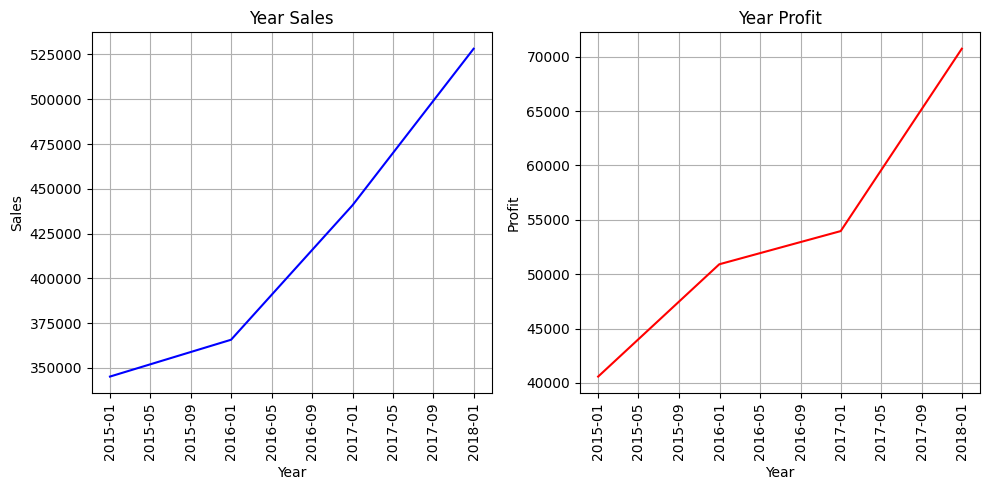

In [24]:
#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#plot sales yearly
axes[0].plot(yearly_sales.index, yearly_sales['Sales'],color='blue')
axes[0].set_title("Year Sales")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sales')
axes[0].grid(True)
axes[0].tick_params(axis='x',rotation=90)

#plot profit yearly
axes[1].plot(yearly_sales.index, yearly_sales['Profit'],color='red')
axes[1].set_title("Year Profit")
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Profit')
axes[1].grid(True)
axes[1].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()

****Explain the charts****

```The charts above shows the profit and sales over four-year period.The X-axis is labeled "Year" with the data points from 2015 to 2018.The Y-axis on the left labeled "Sales" with data points 500,000 to 700,000.The Y-axis on the right is labeled "Profit" and has values ranging from 0 to 50,000.```

### Monthly Sales and Profit

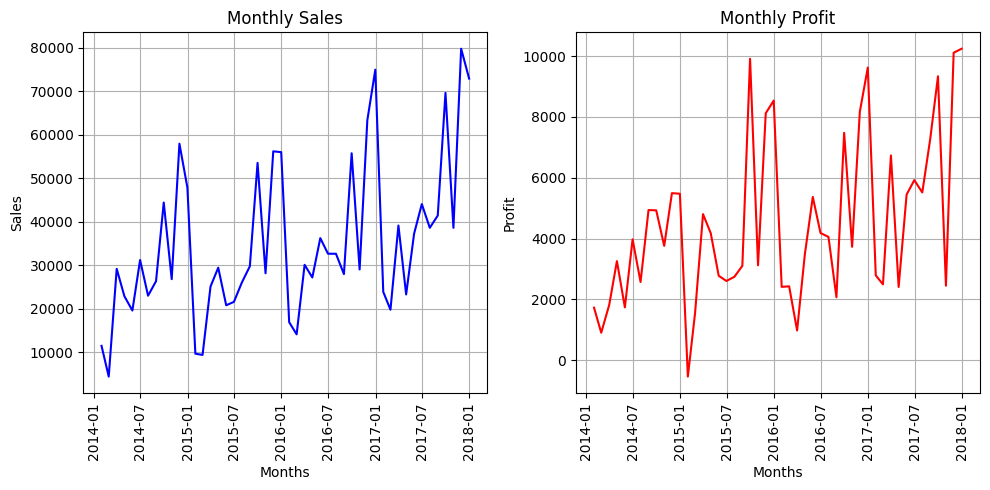

In [25]:
#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#plot sales yearly
axes[0].plot(Monthly_sales.index, Monthly_sales['Sales'],color='blue')
axes[0].set_title("Monthly Sales")
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Sales')
axes[0].grid(True)
axes[0].tick_params(axis='x',rotation=90)

#plot profit yearly
axes[1].plot(Monthly_sales.index, Monthly_sales['Profit'],color='red')
axes[1].set_title("Monthly Profit")
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Profit')
axes[1].grid(True)
axes[1].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()

****Explain the charts****

```The chart above shows the Monthly sales and profit over a four-year period.The x-axis is labeled Months with data points ranging from january 2014 to january 2018.The y-axix on the left is labeled monthly sales and has values ranging from 20,000 to 120,000.The y-axis on the right is labeled monthly profit and has values ranging from 0 to 15,000. ```

### Daily sales and profit

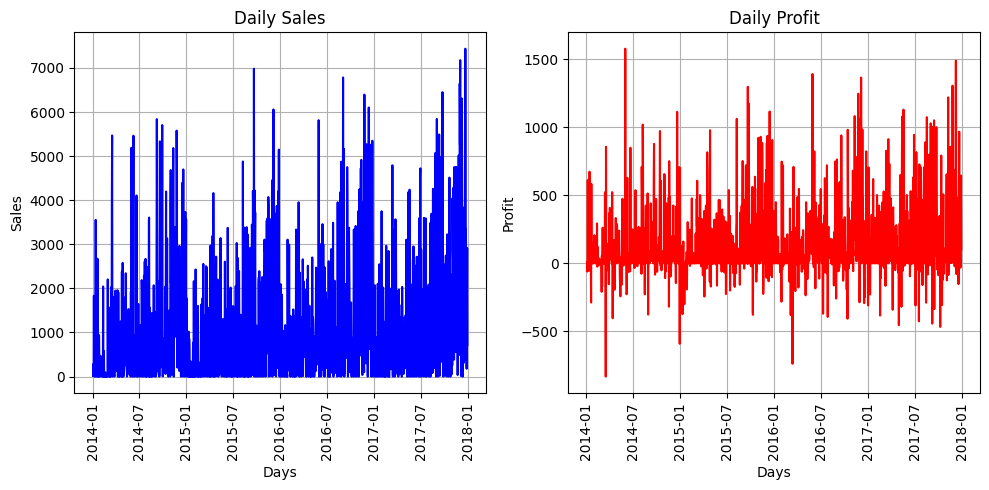

In [26]:
#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#plot sales yearly
axes[0].plot(daily_sales.index, daily_sales['Sales'],color='blue')
axes[0].set_title("Daily Sales")
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Sales')
axes[0].grid(True)
axes[0].tick_params(axis='x',rotation=90)

#plot profit yearly
axes[1].plot(daily_sales.index, daily_sales['Profit'],color='red')
axes[1].set_title("Daily Profit")
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Profit')
axes[1].grid(True)
axes[1].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()

****Explain the charts****

```The chart above shows the Daily sales and profit over a four-year period.The X-axis is labeled "Days" with data points of across four years.The y-axis on the left is labeled sales and has values ranging from 0 to 25,000.The y-axis on the right is labeled Profit and has values ranging from -6000 to 8000.The graph shows a lot of day to day variation.```

In [27]:
df.Sub_Category.nunique()

17

In [28]:
df.Sub_Category.unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [29]:
salesBy_Category = df[['Order_Date','Sales','Category','Sub_Category']].copy()
salesBy_Category

,Order_Date,Sales,Category,Sub_Category
0,11/8/2016,261.9600,Furniture,Bookcases
1,11/8/2016,731.9400,Furniture,Chairs
2,6/12/2016,14.6200,Office Supplies,Labels
3,10/11/2015,957.5775,Furniture,Tables
4,10/11/2015,22.3680,Office Supplies,Storage
...,...,...,...,...
9989,1/21/2014,25.2480,Furniture,Furnishings
9990,2/26/2017,91.9600,Furniture,Furnishings
9991,2/26/2017,258.5760,Technology,Phones
9992,2/26/2017,29.6000,Office Supplies,Paper


### Sales by product of different Categories

In [30]:
#data col is formatted as datetime
salesBy_Category['Order_Date'] = pd.to_datetime(salesBy_Category['Order_Date'])

In [31]:
sales_category = salesBy_Category.groupby('Sub_Category')['Sales'].sum()

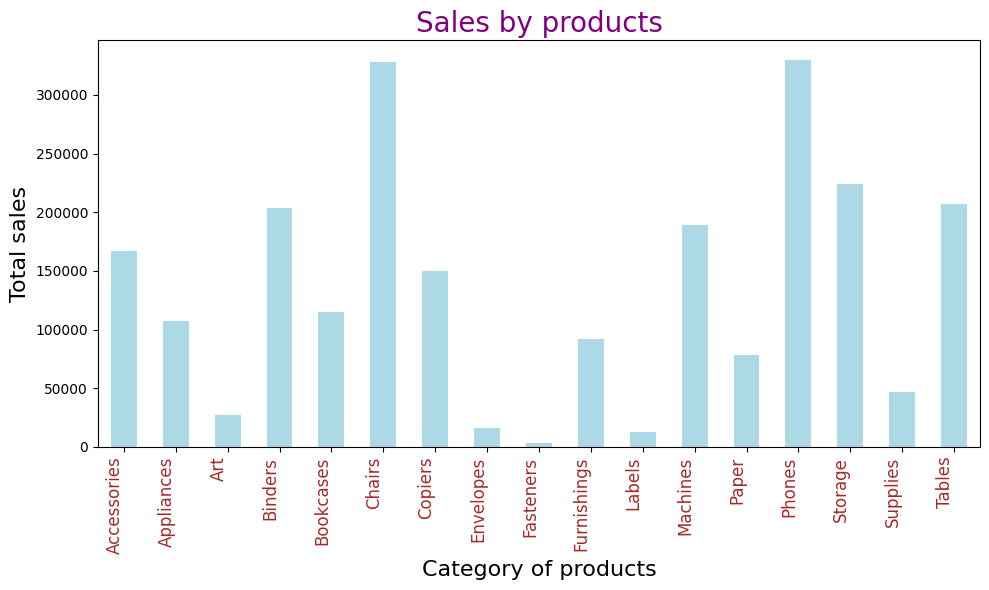

In [32]:
plt.figure(figsize=(10, 6))
bar = sales_category.plot(kind='bar', color='lightblue')
plt.title('Sales by products',fontsize=20,color='purple')
plt.xlabel('Category of products',fontsize=16)
plt.ylabel('Total sales',fontsize=16)
plt.xticks(rotation=90, ha='right',fontsize=12, color='Brown')
plt.tight_layout()
plt.show()

****Explain the graph****

````The graph above shows the sales by product of different categories .The y-axis shows the total sales and ranges from 0 to 300,000.The x-axis shows the categories of products includes like accessories,appliances,chairs,labels,etc.This graph shows different categories and identify which ones are selling the most.````

In [33]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### summary statistics for key metrics such as revenue and quantity sold

In [34]:
#calculate revenue for each sale
df['Revenue'] = df['Quantity'] * df['Profit']

In [35]:
#statistics for key metrics
Stats = df.agg({
    'Quantity' : ['mean','median','min','max','std'],
    'Revenue' : ['mean','median','min','max','std']
})
Stats

,Quantity,Revenue
mean,3.789574,143.128735
median,3.000000,26.371800
min,1.000000,-32999.890000
max,14.000000,64302.810000
std,2.225110,1388.955607


In [36]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [37]:
corr = df[['Order_Date','Profit','Country','Segment','City','State','Region','Category','Sub_Category','Product_Name','Sales','Quantity','Discount','Revenue']].copy()
corr.describe()

,Profit,Sales,Quantity,Discount,Revenue
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,28.656896,229.858001,3.789574,0.156203,143.128735
std,234.260108,623.245101,2.225110,0.206452,1388.955607
min,-6599.978000,0.444000,1.000000,0.000000,-32999.890000
25%,1.728750,17.280000,2.000000,0.000000,3.208825
50%,8.666500,54.490000,3.000000,0.200000,26.371800
75%,29.364000,209.940000,5.000000,0.200000,114.702075
max,8399.976000,22638.480000,14.000000,0.800000,64302.810000


In [38]:
# getting variables that only have numerical values
df2 = Cleaned_data.convert_dtypes().select_dtypes("number")
df2

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
0,1,42420,261.96,2,0.0,41.9136
1,2,42420,731.94,3,0.0,219.582
2,3,90036,14.62,2,0.0,6.8714
3,4,33311,957.5775,5,0.45,-383.031
4,5,33311,22.368,2,0.2,2.5164
...,...,...,...,...,...,...
9989,9990,33180,25.248,3,0.2,4.1028
9990,9991,92627,91.96,2,0.0,15.6332
9991,9992,92627,258.576,2,0.2,19.3932
9992,9993,92627,29.6,4,0.0,13.32


In [39]:
corr_data = df2[df2.columns[2:]].corr()
corr_data

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.253133,-0.010596,0.449825
Quantity,0.253133,1.000000,0.003517,0.119362
Discount,-0.010596,0.003517,1.000000,-0.359596
Profit,0.449825,0.119362,-0.359596,1.000000


<Axes: >

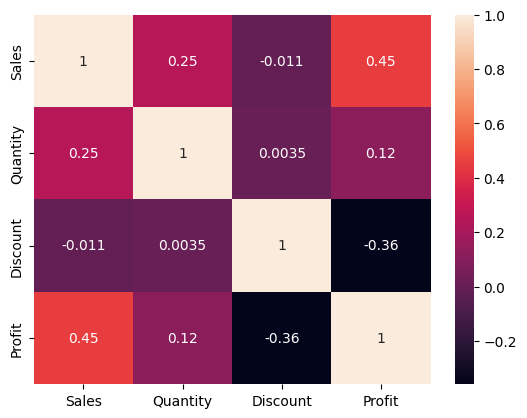

In [40]:
sns.heatmap(corr_data, annot=True)

****Explain the correlations between variables****

``1. The above Heatmap used to visualize the correlation between different numerical variables.In this specific matrix,the variables are sales,Quantity,discount and profit.``

``2. The Scale goes from -1(Negative correlation) in the bottom left corner to 1 (positive correlation) in the top right corner. A value of 0 indicates no correlation.``

``3. Sales and quantity appear to have a strong positive correlation, which means that when sales increase, quantity also increases.``

``4. Sales and quantity appear to have a weak negative correlation,which means that there might be a slight decrease in sales when there is an increase in discount.This could be because discounts can reduce profit margins.``

``5. Profit and quantity appear to have a moderate negative correlation,which means that as discount increase,profit tends to decrease.This again makes sense, as discounts typically reduce the amount of money a company makes on each sale.``

``6. Profit and quantity appear to have a weak positive correlation, which means that there might be a slight increase in profit when there is an increase in quantity sold.Means,the
correlation is weak,so this realtionship is not very clear.``
